In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import re

plt.style.use('fivethirtyeight')

# Figures inline and set visualization style
%matplotlib inline

In [2]:
df=pd.read_csv("data/prime.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
#                    50 non-null int64
2                    50 non-null int64
Digits               50 non-null object
Date Discovered      50 non-null object
Discovered By        50 non-null object
Method / Hardware    46 non-null object
Perfect Number       50 non-null int64
dtypes: int64(3), object(4)
memory usage: 2.8+ KB


In [4]:
#We drop the columns we wont be using
df.drop(['#','2','Discovered By','Method / Hardware','Perfect Number'], axis=1,inplace=True)

In [5]:
#We rename the columns
df.rename(columns={'Date Discovered': 'DateDisc'}, inplace=True)

In [6]:
df.head()

,Digits,DateDisc
0,1,c. 500 BCE
1,1,c. 500 BCE
2,2,c. 275 BCE
3,3,c. 275 BCE
4,4,1456


In [7]:
df['DateDisc'].value_counts()

1588           2
c. 275 BCE     2
c. 500 BCE     2
1952 Jan 30    2
1961 Nov 03    2
2013 Jan 25    1
1992 Feb 19    1
1456           1
1998 Jan 27    1
2005 Dec 15    1
2004 May 15    1
1971 Mar 04    1
1963 May 11    1
1988 Jan 28    1
1952 Oct 07    1
1979 Feb 09    1
1996 Sep 03    1
1999 Jun 01    1
2001 Nov 14    1
1883           1
2016 Jan 07    1
2008 Sep 06    1
1982 Sep 25    1
2017 Dec 26    1
1978 Oct 30    1
1979 Apr 08    1
1876 Jan 10    1
1914 Jun 11    1
1952 Oct 09    1
1772           1
1952 Jun 25    1
1963 Jun 02    1
1983 Sep 19    1
2005 Feb 18    1
1996 Nov 13    1
2006 Sep 04    1
1994 Jan 04    1
1911 Jun       1
1957 Sep 08    1
1963 May 16    1
1985 Sep 01    1
2003 Nov 17    1
2008 Aug 23    1
1997 Aug 24    1
2009 Jun 04    1
Name: DateDisc, dtype: int64

We extract the year from the column DateDisc

In [8]:
def get_year(df):
    year=[]
    for item in df.iteritems():
        #We search for year
        match = re.search('\d\d\d\d', item[1])
        if match:
            year.append(match.group())
        else:
            #We set year to 1400 for the case of a year less than 1456 
            year.append('1400')
    return year
            
df['Year']=get_year(df['DateDisc'])

In [9]:
df.head()

,Digits,DateDisc,Year
0,1,c. 500 BCE,1400
1,1,c. 500 BCE,1400
2,2,c. 275 BCE,1400
3,3,c. 275 BCE,1400
4,4,1456,1456


In [10]:
#We set the year to 1678 for years that are less than equal (so we can handle the dates in pandas)
def fix_year(df):
    years=[]
    for item in df.iteritems():
        if int(item[1])<1678:
            years.append('1678')
        else:
            years.append(item[1])
    return years

df['Year']=fix_year(df['Year'])

In [11]:
df['Year']=pd.to_datetime(df['Year'].astype(str),format="%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
Digits      50 non-null object
DateDisc    50 non-null object
Year        50 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.2+ KB


In [12]:
df.set_index('Year',inplace=True)

Since some observations in Digits column contain ',' we need to remove this before casting to int. 

In [13]:
def remove_comma_digits(df):
    digits=[]
    for elem in df.iteritems():
        digits.append(elem[1].replace(',', ''))
    return digits

df['Digits']=remove_comma_digits(df['Digits'])

In [14]:
df['Digits']=pd.to_numeric(df["Digits"])

Text(0,0.5,'Length in digits (log scale)')

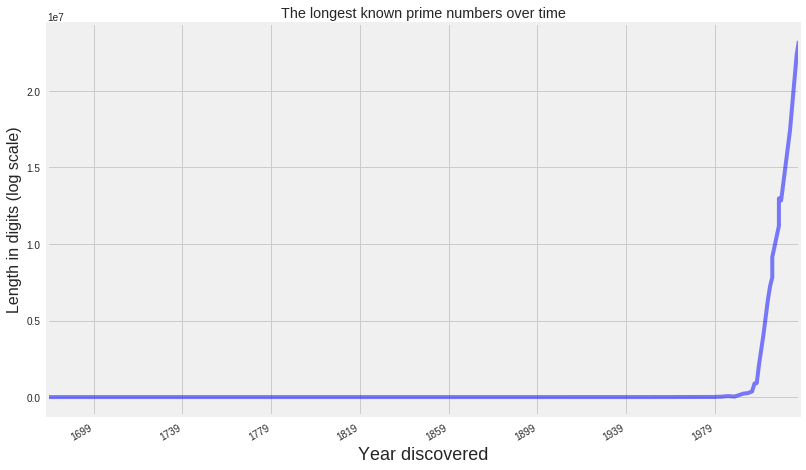

In [15]:
#This is our initial plot and we work on transforming it until it looks like the one from the website
plt.figure(figsize=(12,8))
plt.title('The longest known prime numbers over time')

df["Digits"].plot(alpha=0.5,color='blue')

plt.xlabel('Year discovered', fontsize=18)
plt.ylabel('Length in digits (log scale)', fontsize=16)

In [16]:
import matplotlib.style as style
style.use('fivethirtyeight')

(0, 10000000)

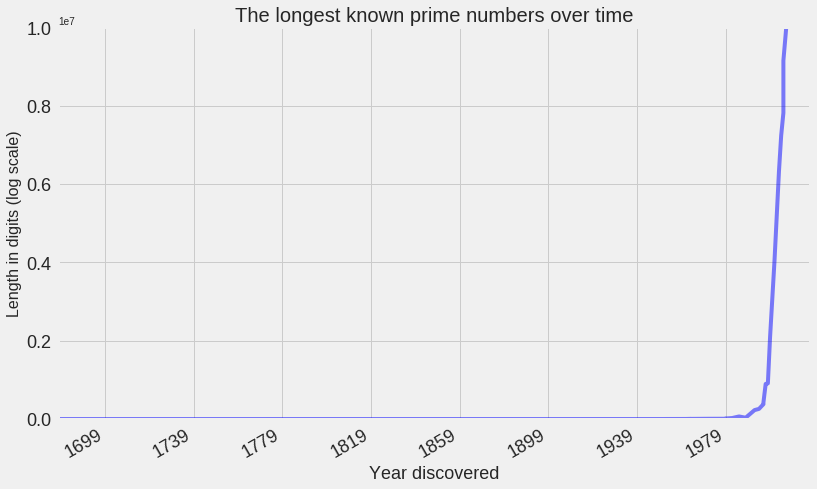

In [18]:
plt.figure(figsize=(12,8))
plt.title('The longest known prime numbers over time')

ax=df["Digits"].plot(alpha=0.5,color='blue')
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)

plt.xlabel('Year discovered', fontsize=18)
plt.ylabel('Length in digits (log scale)', fontsize=16)
plt.ylim(0, 10000000)